In [173]:
import numpy as np
import matplotlib.pyplot as plt

In [174]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [175]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [176]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [177]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [178]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [179]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [194]:
def calc_logloss(y, y_pred):
    # err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = -1.0 / len(y) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    err = np.sum(err)
    return err

In [195]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [158]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [159]:
z = np.linspace(-10, 10, 101)

In [160]:
probabilities = sigmoid(z)

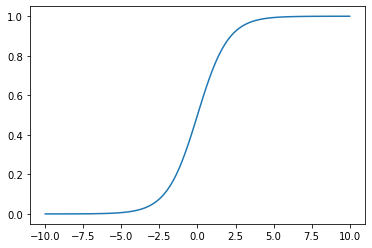

In [161]:
plt.plot(z, probabilities)

In [162]:
### Logistic Regression

In [211]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = sigmoid(np.dot(W, X))
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot(X, (y_pred - y).T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [212]:
W = eval_model(X_st, y, iterations=10000, alpha=1e-4)

1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.039515824473949
2000 [ 0.4236874  -0.36359967  0.6425439   1.41506965] 0.8807599507543653
3000 [ 0.39201058 -0.45900098  0.64080604  1.36974771] 0.7587599806535031
4000 [ 0.36455825 -0.53307004  0.64184068  1.33337513] 0.682537501076679
5000 [ 0.34113653 -0.58526221  0.64604926  1.30592474] 0.64168466229347
6000 [ 0.32088549 -0.6208707   0.65260867  1.28543874] 0.6200744628368994
7000 [ 0.30297172 -0.64525903  0.66061929  1.26993179] 0.6077787494981907
8000 [ 0.28679129 -0.66211922  0.66947217  1.2579795 ] 0.6000619428459091
9000 [ 0.27192766 -0.67381777  0.67879241  1.24862026] 0.5947176154622895
10000 [ 0.25808924 -0.68189547  0.68834749  1.2411954 ] 0.5906743816929662


---

# Домашнее задание

    1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  
    
    2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
    
    3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
    
    4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
    
    5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
    
    6. Могла ли модель переобучиться? Почему?
    
    7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

---

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

In [243]:
def calc_logloss(y, y_pred):

    err = -1.0 / len(y) * np.sum(y * np.log(y_pred, where=(y_pred!=0)) + (1 - y) * np.log(1 - y_pred, where=(1 - y_pred!=0)))
    err = np.sum(err)
    return err

---

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [247]:
W = eval_model(X_st, y, iterations=100000, alpha=40)

10000 [-271.52136061  -19.50702903  -80.31856373  208.23771001] 0.003201588255000189
20000 [-282.87800765  -19.46027856  -84.22686341  215.52015189] 0.002667475915677985
30000 [-292.17003934  -20.04019167  -87.04368153  222.4874873 ] 0.0023089627288499803
40000 [-300.29368305  -20.54727853  -89.50622567  228.57893026] 0.0020350462330568225
50000 [-307.50915952  -20.99774038  -91.69341586  233.9895204 ] 0.0018190072886442568
60000 [-313.99858516  -21.40292074  -93.66047995  238.85576704] 0.0016442911782120332
70000 [-319.89436154  -21.77106945  -95.44756682  243.27692049] 0.0015000987992192225
80000 [-325.29574689  -22.10837296  -97.08477349  247.32738981] 0.0013790877333644217
90000 [-330.27905748  -22.41958895  -98.59523952  251.06438791] 0.0012760929098318313
100000 [-334.90422661  -22.7084545   -99.99713633  254.53284714] 0.0011873759064476806


---

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [264]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [265]:
calc_pred_proba(W, X_st)

array([5.91888773e-03, 7.28571937e-21, 1.00000000e+00, 6.58635840e-12,
       9.99690406e-01, 5.86753922e-20, 1.00000000e+00, 5.71759315e-05,
       9.94445102e-01, 1.00000000e+00])

---

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [266]:
def calc_pred_proba(W, X, threshold):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    y_pred[y_pred > threshold] = 1
    y_pred[y_pred < 1] = 0
    return  y_pred
    

In [267]:
y_pred = calc_pred_proba(W, X_st, 0.5)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [269]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

---

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

И так очевидно что все метрики будут единичные

In [253]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [254]:
confusion_matrix(y, y_pred)

array([[5, 0],
       [0, 5]])

In [255]:
accuracy_score(y, y_pred)

1.0

In [256]:
recall_score(y, y_pred)

1.0

In [257]:
precision_score(y, y_pred)

1.0

In [258]:
f1_score(y, y_pred)

1.0

---

6. Могла ли модель переобучиться? Почему?

Модель переобучилась так как у функции ошибки нет минимума и мы бесконечно подгоняем модель под заданные значения, ввиду большого числа степеней свобод

---

7. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [273]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = sigmoid(np.dot(W, X))
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot(X, (y_pred - y).T) + lambda_ * W)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [299]:
W = eval_model_l1(X_st, y, iterations=100000, alpha=1e-1, lambda_=1e-3)

10000 [-7.50115902 -1.15533653 -1.20575075  6.50028423] 0.29844965499020404
20000 [-7.97701888 -1.18690697 -1.36289917  6.86412657] 0.2915698990532969
30000 [-8.03370576 -1.19077062 -1.38149177  6.90774654] 0.29077812364628247
40000 [-8.04074811 -1.19125205 -1.38379978  6.91316943] 0.2906801499650505
50000 [-8.04162732 -1.19131217 -1.3840879   6.91384652] 0.29066792429133337
60000 [-8.04173716 -1.19131968 -1.38412389  6.91393111] 0.2906663971158108
70000 [-8.04175088 -1.19132062 -1.38412839  6.91394167] 0.2906662063231719
80000 [-8.04175259 -1.19132074 -1.38412895  6.91394299] 0.2906661824867352
90000 [-8.04175281 -1.19132076 -1.38412902  6.91394316] 0.29066617950875434
100000 [-8.04175283 -1.19132076 -1.38412903  6.91394318] 0.2906661791367036


In [300]:
y_pred = calc_pred_proba(W, X_st, 0.5)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [302]:
f1_score(y, y_pred)

0.888888888888889

Эта модель уже менее переобучена